# Gen data

In [17]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)


In [18]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

In [19]:
X0

array([[2.22096057, 2.70132234, 3.08493823, 2.02701417, 2.73223639,
        1.21171968, 2.22920603, 1.8637762 , 1.74682699, 2.37191737],
       [2.19579728, 3.43487375, 2.70849736, 1.47010441, 2.32571583,
        2.23682627, 1.72925457, 1.59716548, 2.27230351, 2.37595358]])

In [20]:
X1

array([[4.47403369, 4.09281249, 4.22222334, 4.58438569, 4.74493118,
        3.6355797 , 5.19217738, 3.51075436, 3.93784332, 3.8787214 ],
       [2.4040742 , 1.65061706, 2.11659863, 2.05326933, 2.67628604,
        2.63347726, 3.2425902 , 2.11880111, 1.56029947, 2.12126884]])

In [21]:
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

In [22]:
X

array([[2.22096057, 2.70132234, 3.08493823, 2.02701417, 2.73223639,
        1.21171968, 2.22920603, 1.8637762 , 1.74682699, 2.37191737,
        4.47403369, 4.09281249, 4.22222334, 4.58438569, 4.74493118,
        3.6355797 , 5.19217738, 3.51075436, 3.93784332, 3.8787214 ],
       [2.19579728, 3.43487375, 2.70849736, 1.47010441, 2.32571583,
        2.23682627, 1.72925457, 1.59716548, 2.27230351, 2.37595358,
        2.4040742 , 1.65061706, 2.11659863, 2.05326933, 2.67628604,
        2.63347726, 3.2425902 , 2.11880111, 1.56029947, 2.12126884]])

In [23]:
y

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]])

In [24]:
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [25]:
X

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [2.22096057, 2.70132234, 3.08493823, 2.02701417, 2.73223639,
        1.21171968, 2.22920603, 1.8637762 , 1.74682699, 2.37191737,
        4.47403369, 4.09281249, 4.22222334, 4.58438569, 4.74493118,
        3.6355797 , 5.19217738, 3.51075436, 3.93784332, 3.8787214 ],
       [2.19579728, 3.43487375, 2.70849736, 1.47010441, 2.32571583,
        2.23682627, 1.72925457, 1.59716548, 2.27230351, 2.37595358,
        2.4040742 , 1.65061706, 2.11659863, 2.05326933, 2.67628604,
        2.63347726, 3.2425902 , 2.11880111, 1.56029947, 2.12126884]])

In [26]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [27]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

In [31]:
w

[array([[-0.3135082 ],
        [ 0.77101174],
        [-1.86809065]]),
 array([[ 0.6864918 ],
        [ 2.63478794],
        [-0.27092518]]),
 array([[-0.3135082 ],
        [-1.83924575],
        [-2.67499938]]),
 array([[ 0.6864918 ],
        [ 0.38171482],
        [-0.4792021 ]]),
 array([[-0.3135082 ],
        [-3.5561285 ],
        [-2.03950157]]),
 array([[ 0.6864918 ],
        [-1.52911433],
        [-0.56939716]]),
 array([[1.6864918 ],
        [0.7000917 ],
        [1.15985741]]),
 array([[ 0.6864918 ],
        [-4.04483948],
        [-1.51642863]]),
 array([[ 1.6864918 ],
        [-1.67292211],
        [ 0.85952495]]),
 array([[2.6864918 ],
        [0.19085409],
        [2.45669043]]),
 array([[ 1.6864918 ],
        [-3.31990027],
        [ 0.33788932]]),
 array([[ 2.6864918],
        [-1.0989397],
        [ 2.5336866]]),
 array([[ 1.6864918 ],
        [-4.9776611 ],
        [ 0.41241776]]),
 array([[ 2.6864918 ],
        [-2.95064692],
        [ 1.88252217]]),
 array([[3.6864

In [32]:
m

[7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]

In [34]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


MovieWriter imagemagick unavailable; using Pillow instead.


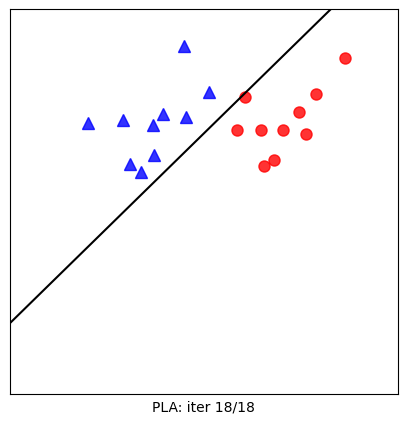

In [35]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
viz_alg_1d_2(w)